In [1]:
import numpy as np
import pickle
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data


In [2]:
full_addr_im = pd.read_csv('Graph - Sheet3.csv', header=None)[1:].drop(columns = [0]).astype(int)
full_addr_im = full_addr_im.to_numpy()
np.savetxt("full_addr_im.csv", full_addr_im,fmt="%d", delimiter=",")
full_addr_im

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1, 0, 3, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [3]:
full_addr_am = np.dot(full_addr_im, full_addr_im.T)
full_addr_am = (full_addr_am > 0).astype(int) - np.eye(full_addr_am.shape[0]).astype(int)
np.savetxt("full_addr_am.csv", full_addr_am,fmt="%d", delimiter=",")
full_addr_am

array([[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

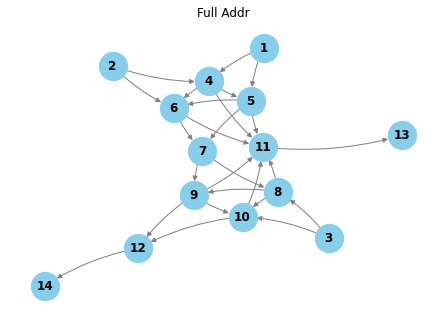

<Figure size 720x720 with 0 Axes>

In [4]:
G = nx.from_numpy_matrix(np.array(full_addr_am))

nodes_label = {}
for i in range(full_addr_am.shape[0]):
    nodes_label[i] = i+1
G = nx.relabel_nodes(G, nodes_label) 

nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True, connectionstyle='arc3,rad=0.1')
plt.title('Full Addr')
plt.figure(figsize=(10,10))
plt.show()

In [5]:
# Convert the adjacency matrix to a torch tensor
adj_tensor = torch.tensor(full_addr_am)

# Extract non-zero indices from the adjacency matrix
edge_indices = torch.nonzero(adj_tensor, as_tuple=False).t().contiguous()

# Create the torch_geometric data object
data = Data(edge_index=edge_indices)

# Optionally, you can also assign node features (x) if available
# data.x = torch.tensor(your_node_features)

# Save the torch_geometric data object to a pickle file
with open('full_addr_data.pkl', 'wb') as f:
    pickle.dump(data, f)


In [6]:
multi_bit_adr_im = pd.read_csv('Graph - multi_im.csv', header=None)[1:].drop(columns=[0])
multi_bit_adr_im = multi_bit_adr_im.to_numpy()
np.savetxt("multi_bit_adr_im.csv", multi_bit_adr_im,fmt="%d", delimiter=",")

In [7]:
multi_bit_adr_am = np.dot(multi_bit_adr_im, multi_bit_adr_im.T)
multi_bit_adr_am = (multi_bit_adr_am > 0).astype(int) - np.eye(multi_bit_adr_am.shape[0]).astype(int)
np.savetxt("multi_bit_adr_am.csv", multi_bit_adr_am,fmt="%d", delimiter=",")
multi_bit_adr_am

array([[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

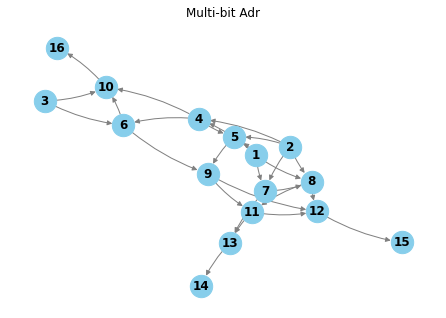

In [8]:
G = nx.from_numpy_matrix(np.array(multi_bit_adr_am))

nodes_label = {}
for i in range(multi_bit_adr_am.shape[0]):
    nodes_label[i] = i+1
G = nx.relabel_nodes(G, nodes_label) 

nx.draw(G, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True, connectionstyle='arc3,rad=0.1')
plt.title('Multi-bit Adr')
plt.show()

In [9]:
# Convert the adjacency matrix to a torch tensor
adj_tensor = torch.tensor(multi_bit_adr_am)

# Extract non-zero indices from the adjacency matrix
edge_indices = torch.nonzero(adj_tensor, as_tuple=False).t().contiguous()

# Create the torch_geometric data object
data = Data(edge_index=edge_indices)

# Optionally, you can also assign node features (x) if available
# data.x = torch.tensor(your_node_features)

# Save the torch_geometric data object to a pickle file
with open('multi_bit_adr.pkl', 'wb') as f:
    pickle.dump(data, f)